In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns
path = r"C:\Users\raghu\Downloads\nyc_taxi"
file = glob.glob(path + "/*.parquet")
print("Found Parquet files:", file)
if len(file) == 0:
    print("Not found!")
else:
    print(f" {len(file)} files found.")

Found Parquet files: ['C:\\Users\\raghu\\Downloads\\nyc_taxi\\yellow_tripdata_2019-01 (1).parquet', 'C:\\Users\\raghu\\Downloads\\nyc_taxi\\yellow_tripdata_2019-02 (1).parquet', 'C:\\Users\\raghu\\Downloads\\nyc_taxi\\yellow_tripdata_2019-03 (1).parquet', 'C:\\Users\\raghu\\Downloads\\nyc_taxi\\yellow_tripdata_2019-04 (1).parquet', 'C:\\Users\\raghu\\Downloads\\nyc_taxi\\yellow_tripdata_2019-05 (1).parquet', 'C:\\Users\\raghu\\Downloads\\nyc_taxi\\yellow_tripdata_2019-06 (1).parquet', 'C:\\Users\\raghu\\Downloads\\nyc_taxi\\yellow_tripdata_2019-07 (1).parquet', 'C:\\Users\\raghu\\Downloads\\nyc_taxi\\yellow_tripdata_2019-08 (1).parquet', 'C:\\Users\\raghu\\Downloads\\nyc_taxi\\yellow_tripdata_2019-09 (1).parquet', 'C:\\Users\\raghu\\Downloads\\nyc_taxi\\yellow_tripdata_2019-10 (1).parquet', 'C:\\Users\\raghu\\Downloads\\nyc_taxi\\yellow_tripdata_2019-11 (1).parquet', 'C:\\Users\\raghu\\Downloads\\nyc_taxi\\yellow_tripdata_2019-12 (1).parquet', 'C:\\Users\\raghu\\Downloads\\nyc_taxi\\ye

In [5]:
for i, j in enumerate(file):
    print(f"Processing {j}")
    df = pd.read_parquet(j)
    df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"], errors="coerce")
    df["tpep_dropoff_datetime"] = pd.to_datetime(df["tpep_dropoff_datetime"], errors="coerce")

    
    df.dropna(subset=["tpep_pickup_datetime", "tpep_dropoff_datetime"], inplace=True)

    
    df = df[(df["tpep_pickup_datetime"] >= "2019-01-01") & (df["tpep_pickup_datetime"] <= "2023-12-31")]
    df = df[(df["tpep_dropoff_datetime"] >= "2019-01-01") & (df["tpep_dropoff_datetime"] <= "2023-12-31")]

    
    df["duration"] = (df["tpep_dropoff_datetime"] - df["tpep_pickup_datetime"]).dt.total_seconds() / 60
    df = df[(df["duration"] > 1) & (df["duration"] < 180)]
    
    df = df[df["trip_distance"] > 0]
    if "fare_amount" in df.columns:
        df = df[df["fare_amount"] > 0]

    df["speed"] = df["trip_distance"] / (df["duration"] / 60)
    df = df[df["speed"] <= 100]

    df.loc[:, "fare_amount"] = df["fare_amount"].fillna(df["fare_amount"].median())
    df.loc[:, "trip_distance"] = df["trip_distance"].fillna(df["trip_distance"].median())

    
    if "airport_fee" in df.columns:
        df.drop(columns=["airport_fee"], inplace=True)

    
    df.loc[:, "congestion_surcharge"] = pd.to_numeric(df["congestion_surcharge"], errors="coerce")
    if not df["congestion_surcharge"].dropna().empty:
        df.loc[:, "congestion_surcharge"] = df["congestion_surcharge"].fillna(df["congestion_surcharge"].median())
    else:
        df.loc[:, "congestion_surcharge"] = df["congestion_surcharge"].fillna(0)

    
    if df["passenger_count"].isnull().any():
        df.loc[:, "passenger_count"] = df["passenger_count"].fillna(df["passenger_count"].mode()[0])
    if df["RatecodeID"].isnull().any():
        df.loc[:, "RatecodeID"] = df["RatecodeID"].fillna(df["RatecodeID"].mode()[0])
    if df["store_and_fwd_flag"].isnull().any():
        df.loc[:, "store_and_fwd_flag"] = df["store_and_fwd_flag"].fillna("N")
    if "Airport_fee" in df.columns:
        df.loc[:, "Airport_fee"] = pd.to_numeric(df["Airport_fee"], errors="coerce")
        df.loc[:, "Airport_fee"] = df["Airport_fee"].fillna(0)
        
    df = df[df["passenger_count"] > 0]

    Q1 = df["duration"].quantile(0.25)
    Q3 = df["duration"].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df["duration"] > (Q1 - 1.5 * IQR)) & (df["duration"] < (Q3 + 1.5 * IQR))]

    df["trip_distance"] = pd.to_numeric(df["trip_distance"], downcast="float")
    df["fare_amount"] = pd.to_numeric(df["fare_amount"], downcast="float")
    df["duration"] = pd.to_numeric(df["duration"], downcast="float")
    df["passenger_count"] = pd.to_numeric(df["passenger_count"], downcast="integer")
    
    df["store_and_fwd_flag"] = df["store_and_fwd_flag"].astype("category")
    floatcol = ["fare_amount", "extra", "mta_tax", "tip_amount", "tolls_amount", 
                  "improvement_surcharge", "total_amount", "congestion_surcharge", "speed"]

    df[floatcol] = df[floatcol].astype("float32")

    df = df[df["fare_amount"] <= 500]
    df = df[df["fare_amount"] >= 2.50]
    df = df[df["fare_amount"] >= 0]
    df = df[df["tolls_amount"] >= 0]
    df = df[df["extra"] >= 0]
    
    cleaned = f"cleaned_nyc_taxi_{i}.parquet"
    df.to_parquet(cleaned, index=False)
    print(f" Saved cleaned file: {cleaned}")

print(" All files processed")


Processing C:\Users\raghu\Downloads\nyc_taxi\yellow_tripdata_2019-01 (1).parquet
 Saved cleaned file: cleaned_nyc_taxi_0.parquet
Processing C:\Users\raghu\Downloads\nyc_taxi\yellow_tripdata_2019-02 (1).parquet
 Saved cleaned file: cleaned_nyc_taxi_1.parquet
Processing C:\Users\raghu\Downloads\nyc_taxi\yellow_tripdata_2019-03 (1).parquet
 Saved cleaned file: cleaned_nyc_taxi_2.parquet
Processing C:\Users\raghu\Downloads\nyc_taxi\yellow_tripdata_2019-04 (1).parquet
 Saved cleaned file: cleaned_nyc_taxi_3.parquet
Processing C:\Users\raghu\Downloads\nyc_taxi\yellow_tripdata_2019-05 (1).parquet
 Saved cleaned file: cleaned_nyc_taxi_4.parquet
Processing C:\Users\raghu\Downloads\nyc_taxi\yellow_tripdata_2019-06 (1).parquet
 Saved cleaned file: cleaned_nyc_taxi_5.parquet
Processing C:\Users\raghu\Downloads\nyc_taxi\yellow_tripdata_2019-07 (1).parquet
 Saved cleaned file: cleaned_nyc_taxi_6.parquet
Processing C:\Users\raghu\Downloads\nyc_taxi\yellow_tripdata_2019-08 (1).parquet
 Saved cleaned f

In [3]:
empty = {}
for i in file:
    print(f"Processing {i}")
    df = pd.read_parquet(i)
    nulls = df.isnull().sum()
    for col, count in nulls.items():
        empty[col] = empty.get(col, 0) + count

df_empty = pd.DataFrame(list(empty.items()), columns=["Column", "Total Null Values"]).sort_values(by="Total Null Values", ascending=False)
print(df_empty)

Processing C:\Users\raghu\Downloads\nyc_taxi\yellow_tripdata_2019-01 (1).parquet
Processing C:\Users\raghu\Downloads\nyc_taxi\yellow_tripdata_2019-02 (1).parquet
Processing C:\Users\raghu\Downloads\nyc_taxi\yellow_tripdata_2019-03 (1).parquet
Processing C:\Users\raghu\Downloads\nyc_taxi\yellow_tripdata_2019-04 (1).parquet
Processing C:\Users\raghu\Downloads\nyc_taxi\yellow_tripdata_2019-05 (1).parquet
Processing C:\Users\raghu\Downloads\nyc_taxi\yellow_tripdata_2019-06 (1).parquet
Processing C:\Users\raghu\Downloads\nyc_taxi\yellow_tripdata_2019-07 (1).parquet
Processing C:\Users\raghu\Downloads\nyc_taxi\yellow_tripdata_2019-08 (1).parquet
Processing C:\Users\raghu\Downloads\nyc_taxi\yellow_tripdata_2019-09 (1).parquet
Processing C:\Users\raghu\Downloads\nyc_taxi\yellow_tripdata_2019-10 (1).parquet
Processing C:\Users\raghu\Downloads\nyc_taxi\yellow_tripdata_2019-11 (1).parquet
Processing C:\Users\raghu\Downloads\nyc_taxi\yellow_tripdata_2019-12 (1).parquet
Processing C:\Users\raghu\Do

In [114]:
file = glob.glob("cleaned_nyc_taxi_*.parquet")
empty = {}
for i in file:
    print(f"Processing {i}")
    df = pd.read_parquet(i)
    nulls = df.isnull().sum()
    for col, count in nulls.items():
        empty[col] = empty.get(col, 0) + count

df_empty = pd.DataFrame(list(empty.items()), columns=["Column", "Total Null Values"]).sort_values(by="Total Null Values", ascending=False)
print(df_empty)

Processing cleaned_nyc_taxi_0.parquet...
Processing cleaned_nyc_taxi_1.parquet...
Processing cleaned_nyc_taxi_10.parquet...
Processing cleaned_nyc_taxi_11.parquet...
Processing cleaned_nyc_taxi_12.parquet...
Processing cleaned_nyc_taxi_13.parquet...
Processing cleaned_nyc_taxi_14.parquet...
Processing cleaned_nyc_taxi_15.parquet...
Processing cleaned_nyc_taxi_16.parquet...
Processing cleaned_nyc_taxi_17.parquet...
Processing cleaned_nyc_taxi_18.parquet...
Processing cleaned_nyc_taxi_19.parquet...
Processing cleaned_nyc_taxi_2.parquet...
Processing cleaned_nyc_taxi_20.parquet...
Processing cleaned_nyc_taxi_21.parquet...
Processing cleaned_nyc_taxi_22.parquet...
Processing cleaned_nyc_taxi_23.parquet...
Processing cleaned_nyc_taxi_24.parquet...
Processing cleaned_nyc_taxi_25.parquet...
Processing cleaned_nyc_taxi_26.parquet...
Processing cleaned_nyc_taxi_27.parquet...
Processing cleaned_nyc_taxi_28.parquet...
Processing cleaned_nyc_taxi_29.parquet...
Processing cleaned_nyc_taxi_3.parquet

In [7]:
file = glob.glob("cleaned_nyc_taxi_*.parquet")
yearly = {}
for file in file:
    print(f"Processing {file}...")
    df = pd.read_parquet(file, columns=["tpep_pickup_datetime"])
    year = df["tpep_pickup_datetime"].dt.year.value_counts().to_dict()
    for i, j in year.items():
        yearly[i] = yearly.get(i, 0) + j

df_yearly = pd.DataFrame(list(yearly.items()), columns=["Year", "Trip_Count"]).sort_values(by="Year")
print(df_yearly)

Processing cleaned_nyc_taxi_0.parquet...
Processing cleaned_nyc_taxi_1.parquet...
Processing cleaned_nyc_taxi_10.parquet...
Processing cleaned_nyc_taxi_11.parquet...
Processing cleaned_nyc_taxi_12.parquet...
Processing cleaned_nyc_taxi_13.parquet...
Processing cleaned_nyc_taxi_14.parquet...
Processing cleaned_nyc_taxi_15.parquet...
Processing cleaned_nyc_taxi_16.parquet...
Processing cleaned_nyc_taxi_17.parquet...
Processing cleaned_nyc_taxi_18.parquet...
Processing cleaned_nyc_taxi_19.parquet...
Processing cleaned_nyc_taxi_2.parquet...
Processing cleaned_nyc_taxi_20.parquet...
Processing cleaned_nyc_taxi_21.parquet...
Processing cleaned_nyc_taxi_22.parquet...
Processing cleaned_nyc_taxi_23.parquet...
Processing cleaned_nyc_taxi_24.parquet...
Processing cleaned_nyc_taxi_25.parquet...
Processing cleaned_nyc_taxi_26.parquet...
Processing cleaned_nyc_taxi_27.parquet...
Processing cleaned_nyc_taxi_28.parquet...
Processing cleaned_nyc_taxi_29.parquet...
Processing cleaned_nyc_taxi_3.parquet

In [9]:
tot= 0
fares = 0
fare_min = float('inf')
fare_max = float('-inf')
file = glob.glob("cleaned_nyc_taxi_*.parquet")
for file in file:
    print(f"Processing {file}...")
    df = pd.read_parquet(file, columns=["fare_amount"])
    tot += len(df)
    fares += df["fare_amount"].sum()
    fare_min = min(fare_min, df["fare_amount"].min())
    fare_max = max(fare_max, df["fare_amount"].max())
mean = fares / tot
print(f"Total Trips: {tot}")
print(f"Mean Fare: ${mean:.2f}")
print(f"Min Fare: ${fare_min:.2f}")
print(f"Max Fare: ${fare_max:.2f}")

Processing cleaned_nyc_taxi_0.parquet...
Processing cleaned_nyc_taxi_1.parquet...
Processing cleaned_nyc_taxi_10.parquet...
Processing cleaned_nyc_taxi_11.parquet...
Processing cleaned_nyc_taxi_12.parquet...
Processing cleaned_nyc_taxi_13.parquet...
Processing cleaned_nyc_taxi_14.parquet...
Processing cleaned_nyc_taxi_15.parquet...
Processing cleaned_nyc_taxi_16.parquet...
Processing cleaned_nyc_taxi_17.parquet...
Processing cleaned_nyc_taxi_18.parquet...
Processing cleaned_nyc_taxi_19.parquet...
Processing cleaned_nyc_taxi_2.parquet...
Processing cleaned_nyc_taxi_20.parquet...
Processing cleaned_nyc_taxi_21.parquet...
Processing cleaned_nyc_taxi_22.parquet...
Processing cleaned_nyc_taxi_23.parquet...
Processing cleaned_nyc_taxi_24.parquet...
Processing cleaned_nyc_taxi_25.parquet...
Processing cleaned_nyc_taxi_26.parquet...
Processing cleaned_nyc_taxi_27.parquet...
Processing cleaned_nyc_taxi_28.parquet...
Processing cleaned_nyc_taxi_29.parquet...
Processing cleaned_nyc_taxi_3.parquet

In [11]:
total = 0
sumd= 0
min_dis= float('inf')
max_dis = float('-inf')
quartiles = []
file = glob.glob("cleaned_nyc_taxi_*.parquet")
for file in file:
    print(f"Processing {file}...")
    df = pd.read_parquet(file, columns=["trip_distance"])
    total += len(df)
    sumd += df["trip_distance"].sum()
    min_dis = min(min_dis, df["trip_distance"].min())
    max_dis = max(max_dis, df["trip_distance"].max())
    quartiles.append(df["trip_distance"].quantile([0.25, 0.50, 0.75]))

mean_dis = sumd / total
quar_df = pd.concat(quartiles, axis=1)
q25, q50, q75 = quar_df.median(axis=1)  

print(f"Total Trips: {total}")
print(f"Mean Trip Distance: {mean_dis:.2f} miles")
print(f"Min Trip Distance: {min_dis:.2f} miles")
print(f"25th Percentile: {q25:.2f} miles")
print(f"Median (50th Percentile): {q50:.2f} miles")
print(f"75th Percentile: {q75:.2f} miles")
print(f"Max Trip Distance: {max_dis:.2f} miles")

Processing cleaned_nyc_taxi_0.parquet...
Processing cleaned_nyc_taxi_1.parquet...
Processing cleaned_nyc_taxi_10.parquet...
Processing cleaned_nyc_taxi_11.parquet...
Processing cleaned_nyc_taxi_12.parquet...
Processing cleaned_nyc_taxi_13.parquet...
Processing cleaned_nyc_taxi_14.parquet...
Processing cleaned_nyc_taxi_15.parquet...
Processing cleaned_nyc_taxi_16.parquet...
Processing cleaned_nyc_taxi_17.parquet...
Processing cleaned_nyc_taxi_18.parquet...
Processing cleaned_nyc_taxi_19.parquet...
Processing cleaned_nyc_taxi_2.parquet...
Processing cleaned_nyc_taxi_20.parquet...
Processing cleaned_nyc_taxi_21.parquet...
Processing cleaned_nyc_taxi_22.parquet...
Processing cleaned_nyc_taxi_23.parquet...
Processing cleaned_nyc_taxi_24.parquet...
Processing cleaned_nyc_taxi_25.parquet...
Processing cleaned_nyc_taxi_26.parquet...
Processing cleaned_nyc_taxi_27.parquet...
Processing cleaned_nyc_taxi_28.parquet...
Processing cleaned_nyc_taxi_29.parquet...
Processing cleaned_nyc_taxi_3.parquet

In [13]:
count = 0
sums = 0
min_speed = float('inf')
max_speed = float('-inf')
quar = []
file = glob.glob("cleaned_nyc_taxi_*.parquet")
for file in file:
    print(f"Processing {file}...")
    df = pd.read_parquet(file, columns=["speed"])
    count += len(df)
    sums += df["speed"].sum()
    min_speed = min(min_speed, df["speed"].min())
    max_speed = max(max_speed, df["speed"].max())
    quar.append(df["speed"].quantile([0.25, 0.50, 0.75]))

mean_speed = sums / count
quardf = pd.concat(quar, axis=1)
q25, q50, q75 = quardf.median(axis=1)  
print(f"Total Trips: {count}")
print(f"Mean Speed: {mean_speed:.2f} mph")
print(f"Min Speed: {min_speed:.2f} mph")
print(f"25th Percentile: {q25:.2f} mph")
print(f"Median (50th Percentile): {q50:.2f} mph")
print(f"75th Percentile: {q75:.2f} mph")
print(f"Max Speed: {max_speed:.2f} mph")

Processing cleaned_nyc_taxi_0.parquet...
Processing cleaned_nyc_taxi_1.parquet...
Processing cleaned_nyc_taxi_10.parquet...
Processing cleaned_nyc_taxi_11.parquet...
Processing cleaned_nyc_taxi_12.parquet...
Processing cleaned_nyc_taxi_13.parquet...
Processing cleaned_nyc_taxi_14.parquet...
Processing cleaned_nyc_taxi_15.parquet...
Processing cleaned_nyc_taxi_16.parquet...
Processing cleaned_nyc_taxi_17.parquet...
Processing cleaned_nyc_taxi_18.parquet...
Processing cleaned_nyc_taxi_19.parquet...
Processing cleaned_nyc_taxi_2.parquet...
Processing cleaned_nyc_taxi_20.parquet...
Processing cleaned_nyc_taxi_21.parquet...
Processing cleaned_nyc_taxi_22.parquet...
Processing cleaned_nyc_taxi_23.parquet...
Processing cleaned_nyc_taxi_24.parquet...
Processing cleaned_nyc_taxi_25.parquet...
Processing cleaned_nyc_taxi_26.parquet...
Processing cleaned_nyc_taxi_27.parquet...
Processing cleaned_nyc_taxi_28.parquet...
Processing cleaned_nyc_taxi_29.parquet...
Processing cleaned_nyc_taxi_3.parquet

In [7]:
list = []
file = glob.glob("cleaned_nyc_taxi_*.parquet")
for file in file:
    print(f"Loading {file}...")
    df_chunk = pd.read_parquet(file)
    list.append(df_chunk)

all = pd.concat(list, ignore_index=True)  
print("\n Data Successfully Loaded!\n")

Loading cleaned_nyc_taxi_0.parquet...
Loading cleaned_nyc_taxi_1.parquet...
Loading cleaned_nyc_taxi_10.parquet...
Loading cleaned_nyc_taxi_11.parquet...
Loading cleaned_nyc_taxi_12.parquet...
Loading cleaned_nyc_taxi_13.parquet...
Loading cleaned_nyc_taxi_14.parquet...
Loading cleaned_nyc_taxi_15.parquet...
Loading cleaned_nyc_taxi_16.parquet...
Loading cleaned_nyc_taxi_17.parquet...
Loading cleaned_nyc_taxi_18.parquet...
Loading cleaned_nyc_taxi_19.parquet...
Loading cleaned_nyc_taxi_2.parquet...
Loading cleaned_nyc_taxi_20.parquet...
Loading cleaned_nyc_taxi_21.parquet...
Loading cleaned_nyc_taxi_22.parquet...
Loading cleaned_nyc_taxi_23.parquet...
Loading cleaned_nyc_taxi_24.parquet...
Loading cleaned_nyc_taxi_25.parquet...
Loading cleaned_nyc_taxi_26.parquet...
Loading cleaned_nyc_taxi_27.parquet...
Loading cleaned_nyc_taxi_28.parquet...
Loading cleaned_nyc_taxi_29.parquet...
Loading cleaned_nyc_taxi_3.parquet...
Loading cleaned_nyc_taxi_30.parquet...
Loading cleaned_nyc_taxi_31.p

In [21]:
file = glob.glob("cleaned_nyc_taxi_*.parquet")

samples = []
rows_needed = 100_000
collected = 0

for file in file:
    if collected >= rows_needed:
        break
    df = pd.read_parquet(file, columns=[
        "tpep_pickup_datetime", "tpep_dropoff_datetime",
        "trip_distance", "fare_amount", "duration", "speed"
    ])
    sample = df.sample(min(len(df), rows_needed - collected), random_state=42)
    samples.append(sample)
    collected += len(sample)
df_sample = pd.concat(samples, ignore_index=True)
summary = df_sample.describe()

pickup_min = df_sample["tpep_pickup_datetime"].min()
pickup_max = df_sample["tpep_pickup_datetime"].max()
dropoff_min = df_sample["tpep_dropoff_datetime"].min()
dropoff_max = df_sample["tpep_dropoff_datetime"].max()

print("\nSummary:")
print(summary)

print("\nDatetime Ranges:")
print(f"Pickup Datetime Range: {pickup_min} - {pickup_max}")
print(f"Dropoff Datetime Range: {dropoff_min} - {dropoff_max}")



Summary:
             tpep_pickup_datetime       tpep_dropoff_datetime  trip_distance  \
count                      100000                      100000  100000.000000   
mean   2019-01-17 01:05:09.836039  2019-01-17 01:16:36.776380       2.304867   
min           2019-01-01 00:00:28         2019-01-01 00:05:14       0.010000   
25%    2019-01-09 17:03:45.500000  2019-01-09 17:14:51.750000       0.900000   
50%    2019-01-16 21:55:17.500000         2019-01-16 22:06:54       1.500000   
75%           2019-01-24 19:00:04  2019-01-24 19:12:01.500000       2.550000   
max           2019-02-01 00:02:12         2019-02-01 00:23:38      28.680000   
std                           NaN                         NaN       2.555086   

         fare_amount       duration          speed  
count  100000.000000  100000.000000  100000.000000  
mean       10.652542      11.449005      11.378616  
min         2.500000       1.016667       0.093750  
25%         6.000000       6.066667       7.585284  
50% 

Sampling from: cleaned_nyc_taxi_0.parquet
Sampling from: cleaned_nyc_taxi_1.parquet
Sampling from: cleaned_nyc_taxi_10.parquet
Sampling from: cleaned_nyc_taxi_11.parquet
Sampling from: cleaned_nyc_taxi_12.parquet
Sampling from: cleaned_nyc_taxi_13.parquet
Sampling from: cleaned_nyc_taxi_14.parquet
Sampling from: cleaned_nyc_taxi_15.parquet
Sampling from: cleaned_nyc_taxi_16.parquet
Sampling from: cleaned_nyc_taxi_17.parquet
Sampling from: cleaned_nyc_taxi_18.parquet
Sampling from: cleaned_nyc_taxi_19.parquet
Sampling from: cleaned_nyc_taxi_2.parquet
Sampling from: cleaned_nyc_taxi_20.parquet
Sampling from: cleaned_nyc_taxi_21.parquet
Sampling from: cleaned_nyc_taxi_22.parquet
Sampling from: cleaned_nyc_taxi_23.parquet
Sampling from: cleaned_nyc_taxi_24.parquet
Sampling from: cleaned_nyc_taxi_25.parquet
Sampling from: cleaned_nyc_taxi_26.parquet
Sampling from: cleaned_nyc_taxi_27.parquet
Sampling from: cleaned_nyc_taxi_28.parquet
Sampling from: cleaned_nyc_taxi_29.parquet
Sampling from:

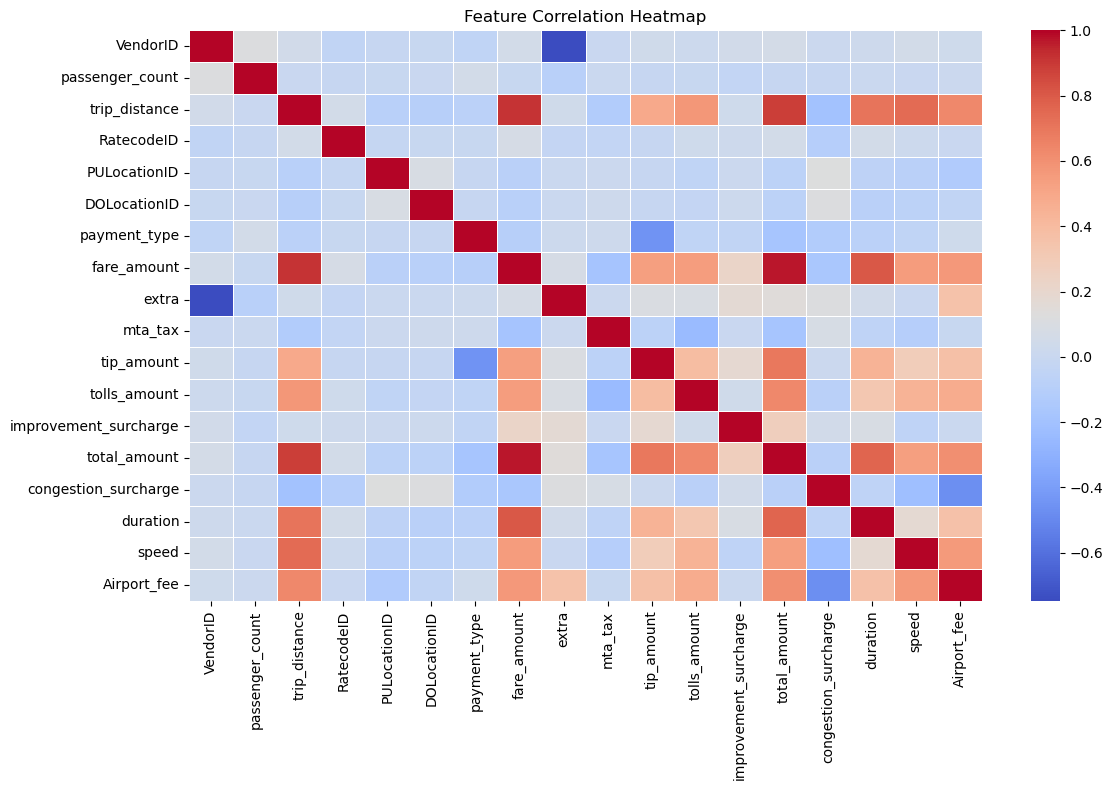

In [3]:
sample_size = 100_000
files = glob.glob("cleaned_nyc_taxi_*.parquet")
df_sampled = pd.DataFrame()
for file in files:
    print(f"Sampling from: {file}")
    df = pd.read_parquet(file)
    df = df.select_dtypes(include=[np.number])
    if len(df) > sample_size // len(file):
        df_sampled = pd.concat([df_sampled, df.sample(sample_size // len(files), random_state=42)])
    else:
        df_sampled = pd.concat([df_sampled, df])

corr_df = df_sampled.corr()
nan_cols = corr_df.columns[corr_df.isna().all()].tolist()
corr_df = corr_df.drop(columns=nan_cols, index=nan_cols)

plt.figure(figsize=(12, 8))
sns.heatmap(corr_df, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()


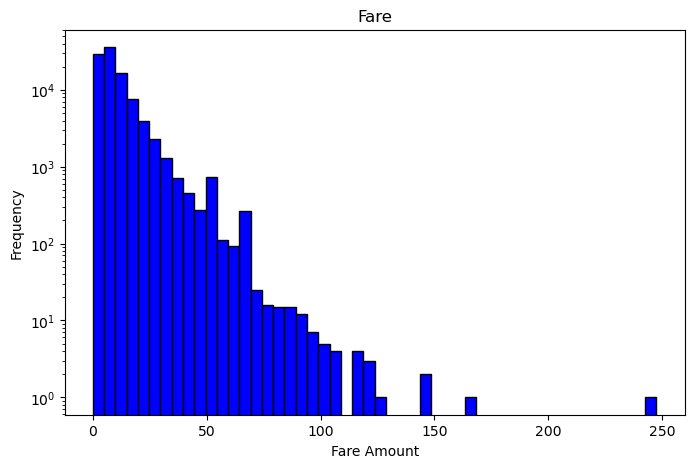

In [7]:
sample_data = all.sample(n=100_000, random_state=42)  
bins = 50  
hist, bin = np.histogram(sample_data["fare_amount"], bins=bins)

plt.figure(figsize=(8, 5))
plt.bar(bin[:-1], hist, width=np.diff(bin), edgecolor="black", color="blue")
plt.title("Fare")
plt.xlabel("Fare Amount")
plt.ylabel("Frequency")
plt.yscale("log") 
plt.show()

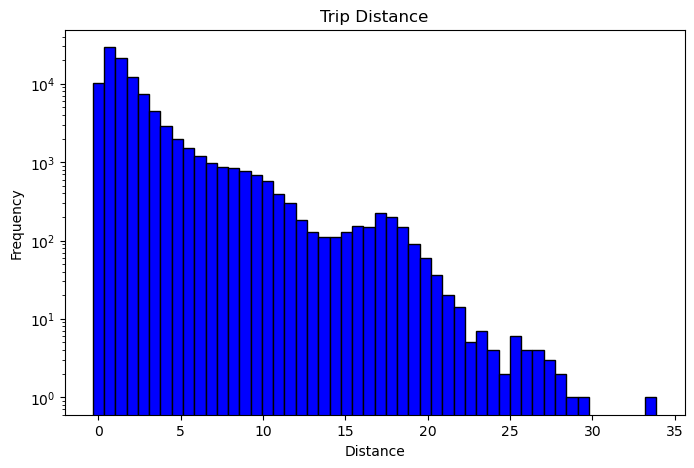

In [11]:
sample = all.sample(n=100_000, random_state=42)  
bins = 50 
hist, bin = np.histogram(sample["trip_distance"], bins=bins)
plt.figure(figsize=(8, 5))
plt.bar(bin[:-1], hist, width=np.diff(bin), edgecolor="black", color="blue")
plt.title("Trip Distance")
plt.xlabel("Distance")
plt.ylabel("Frequency")
plt.yscale("log") 
plt.show()

Processing file 1/26: cleaned_nyc_taxi_0.parquet
Processing file 2/26: cleaned_nyc_taxi_1.parquet
Processing file 3/27: cleaned_nyc_taxi_10.parquet
Processing file 4/27: cleaned_nyc_taxi_11.parquet
Processing file 5/27: cleaned_nyc_taxi_12.parquet
Processing file 6/27: cleaned_nyc_taxi_13.parquet
Processing file 7/27: cleaned_nyc_taxi_14.parquet
Processing file 8/27: cleaned_nyc_taxi_15.parquet
Processing file 9/27: cleaned_nyc_taxi_16.parquet
Processing file 10/27: cleaned_nyc_taxi_17.parquet
Processing file 11/27: cleaned_nyc_taxi_18.parquet
Processing file 12/27: cleaned_nyc_taxi_19.parquet
Processing file 13/26: cleaned_nyc_taxi_2.parquet
Processing file 14/27: cleaned_nyc_taxi_20.parquet
Processing file 15/27: cleaned_nyc_taxi_21.parquet
Processing file 16/27: cleaned_nyc_taxi_22.parquet
Processing file 17/27: cleaned_nyc_taxi_23.parquet
Processing file 18/27: cleaned_nyc_taxi_24.parquet
Processing file 19/27: cleaned_nyc_taxi_25.parquet
Processing file 20/27: cleaned_nyc_taxi_26.

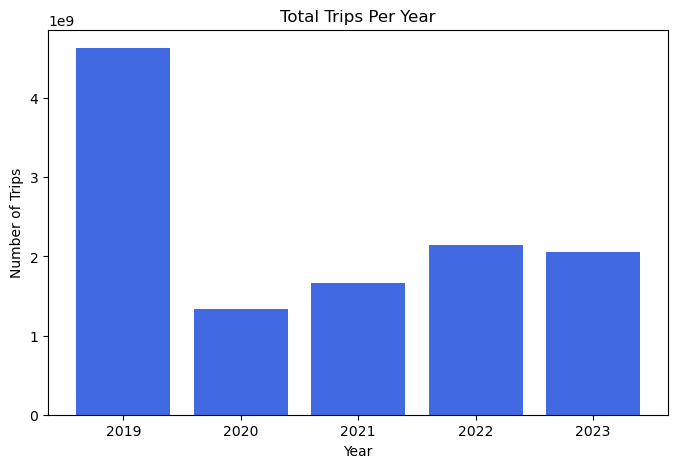

In [3]:
trip_counts = {}
file = sorted(glob.glob("cleaned_nyc_taxi_*.parquet"))
for i, j in enumerate(file):
    print(f"Processing file {i+1}/{len(j)}: {j}")
    df_chunk = pd.read_parquet(file, columns=["tpep_pickup_datetime"])
    df_chunk["year"] = df_chunk["tpep_pickup_datetime"].dt.year
    year = df_chunk["year"].value_counts().to_dict()
    for k, h in year.items():
        trip_counts[k] = trip_counts.get(k, 0) + h

    del df_chunk  

df_yearly = pd.DataFrame(list(trip_counts.items()), columns=["Year", "Trip_Count"]).sort_values(by="Year")

plt.figure(figsize=(8, 5))
plt.bar(df_yearly["Year"], df_yearly["Trip_Count"], color="royalblue")
plt.title("Total Trips Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Trips")
plt.xticks(df_yearly["Year"])  
plt.show()


In [11]:
print("Num of rows and columns:", all.shape)

Num of rows and columns: (197245238, 21)
